<a href="https://colab.research.google.com/github/youngyoung0511/Sound-AI/blob/main/%EC%84%9C%EC%98%81_05_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accuracy와 loss 시각화

*데이터 전처리*

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 불러오기
df = pd.read_csv('/content/drive/My Drive/soundAI/df_concat.csv')

In [3]:
df.head()

,feature,label
0,"[[-0.6867080926895142, -0.35630643367767334, -...",9
1,"[[-0.5121172070503235, -0.15281927585601807, -...",10
2,"[[-0.5510217547416687, -0.40891343355178833, 0...",11
3,"[[-1.0, -0.7065231204032898, -0.52293550968170...",12
4,"[[-0.6754663586616516, -0.8131034970283508, -0...",13


*문자열을 텐서로 변환*

In [ ]:
import ast
import torch

# 문자열을 실제 텐서로 변환하는 함수
def convert_to_tensor(tensor_str):
    # 문자열을 실제 리스트로 변환
    tensor_list = ast.literal_eval(tensor_str)
    # 리스트를 torch 텐서로 변환
    tensor = torch.tensor(tensor_list)
    return tensor

# 'feature' 열의 문자열을 실제 텐서로 변환하여 다시 저장
df['feature'] = df['feature'].apply(convert_to_tensor)

*노이즈 추가*

In [ ]:
# 노이즈 추가 함수 정의
def add_noise(tensor, noise_level=0.01):
    noise = np.random.normal(0, noise_level, tensor.shape)
    return tensor + noise

# 데이터 증강 함수
def augment_data(df, num_augmentations=10, noise_level=0.01):
    augmented_features = []
    augmented_labels = []

    for _, row in df.iterrows():
        feature = np.array(row['feature'])
        label = row['label']

        augmented_features.append(feature)  # 원본 데이터 추가
        augmented_labels.append(label)

        for _ in range(num_augmentations - 1):
            augmented_feature = add_noise(feature, noise_level)
            augmented_features.append(augmented_feature)
            augmented_labels.append(label)

    # 데이터프레임 생성
    augmented_df = pd.DataFrame({
        'feature': augmented_features,
        'label': augmented_labels
    })
    return augmented_df

# 데이터 증강 실행
augmented_df = augment_data(df)

# 결과 확인
print(augmented_df)

                                                feature  label
0     [[-0.6867081, -0.35630643, -0.2785552, -0.1772...      9
1     [[-0.6963940453107426, -0.35591671154590415, -...      9
2     [[-0.6655156299451107, -0.3552015133386548, -0...      9
3     [[-0.7006639524915518, -0.3680908128059794, -0...      9
4     [[-0.6760793850593309, -0.34483324657331654, -...      9
...                                                 ...    ...
1465  [[-0.4267489573746567, -0.07724602908365151, -...    413
1466  [[-0.40486970508289977, -0.08581228067659231, ...    413
1467  [[-0.4227307728852656, -0.11014803456972422, -...    413
1468  [[-0.41434872490566804, -0.08776944515481906, ...    413
1469  [[-0.4176070981045288, -0.09388365575718739, -...    413

[1470 rows x 2 columns]


*중복 행 제거*

In [ ]:
# 각 행마다 feature의 차원을 확인하고 중복을 제거하여 출력

# 각 feature의 차원을 저장할 리스트
feature_dimensions = []

# 데이터프레임의 각 행을 순회하며 feature의 차원을 확인
for feature in augmented_df['feature']:
    feature_dimensions.append(np.array(feature).shape)

# 중복을 제거하여 출력
unique_dimensions = set(feature_dimensions)
print(unique_dimensions)

{(1025, 130), (1025, 87)}


*패딩*

In [ ]:
# 패딩 함수 정의
def pad_feature(feature, target_shape=(1025, 130), pad_value=-1):
    current_shape = feature.shape
    if current_shape == target_shape:
        return feature
    padded_feature = np.full(target_shape, pad_value)
    padded_feature[:, :current_shape[1]] = feature
    return padded_feature

# 각 행마다 패딩 적용
augmented_df['feature'] = augmented_df['feature'].apply(lambda x: pad_feature(np.array(x)))



{(1025, 130)}


In [ ]:
# 각 feature의 차원을 확인하여 중복 제거 후 출력
feature_dimensions = [feature.shape for feature in augmented_df['feature']]
unique_dimensions = set(feature_dimensions)
print(unique_dimensions)

*레이블 반환*

In [ ]:
df['feature'] = df['feature'].apply(lambda x: pad_feature(np.array(x)))

In [ ]:
# 각 feature의 차원을 확인하여 중복 제거 후 출력
feature_dimensions = [feature.shape for feature in df['feature']]
unique_dimensions = set(feature_dimensions)
print(unique_dimensions)

In [ ]:

# augmented_df의 레이블을 오름차순 정렬하고 매핑 생성
unique_labels = np.sort(augmented_df['label'].unique())
label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}

# 매핑을 적용하여 레이블 변환
augmented_df['label'] = augmented_df['label'].map(label_mapping)
df['label'] = df['label'].map(label_mapping)

# 결과 확인
print("Augmented DataFrame Labels After Mapping:")
print(augmented_df['label'].head(10))

print("\nOriginal DataFrame Labels After Mapping:")
print(df['label'].head(10))

{(1025, 130)}
Augmented DataFrame Labels After Mapping:
0    8
1    8
2    8
3    8
4    8
5    8
6    8
7    8
8    8
9    8
Name: label, dtype: int64

Original DataFrame Labels After Mapping:
0     8
1     9
2    10
3    11
4    12
5    31
6    41
7    50
8    58
9    65
Name: label, dtype: int64


*keras를 사용하여 CNN 구현*

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 1023, 128, 32)     320       
                                                                 
 batch_normalization_4 (Bat  (None, 1023, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 511, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 511, 64, 32)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 509, 62, 64)       18496     
                                                                 
 batch_normalization_5 (Bat  (None, 509, 62, 64)      

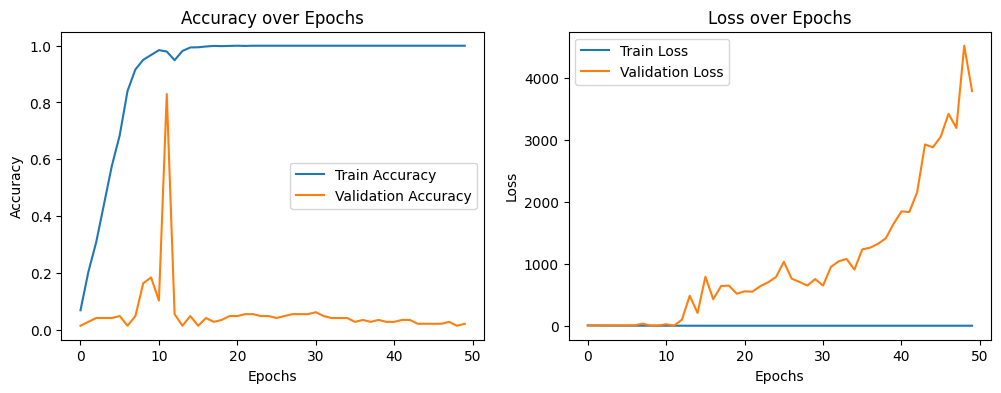

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

# 데이터 및 레이블 준비
X_train = np.stack(augmented_df['feature'].values)
y_train = augmented_df['label'].values

X_test = np.stack(df['feature'].values)
y_test = df['label'].values

# 데이터 형태 조정 (2D CNN 입력 형태로 맞춤)
X_train = X_train[..., np.newaxis]  # (samples, height, width, channels)
X_test = X_test[..., np.newaxis]  # (samples, height, width, channels)

# 레이블 원-핫 인코딩
num_classes = len(np.unique(y_train))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# 2D CNN 모델 정의
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(1025, 130, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 훈련
model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=50, batch_size=32)


# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f'Test accuracy: {accuracy}')

# 정확도와 손실 값을 시각화하는 함수
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 정확도 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    # 손실 값 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.show()

# 정확도와 손실 값 시각화
plot_history(history)

# 정확도 높히기 1

*데이터 정규화 (Normalization): 입력 데이터의 값을 [0,1]로 정규화*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# 데이터 및 레이블 준비
X_train = np.stack(augmented_df['feature'].values)
y_train = augmented_df['label'].values

X_test = np.stack(df['feature'].values)
y_test = df['label'].values

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# 데이터 형태 조정 (2D CNN 입력 형태로 맞춤)
X_train = X_train[..., np.newaxis]  # (samples, height, width, channels)
X_test = X_test[..., np.newaxis]  # (samples, height, width, channels)

# 레이블 원-핫 인코딩
num_classes = len(np.unique(y_train))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [ ]:
# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


In [ ]:
# 2D CNN 모델 정의
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(1025, 130, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 1023, 128, 32)     320       
                                                                 
 batch_normalization_4 (Bat  (None, 1023, 128, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 511, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 511, 64, 32)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 509, 62, 64)       18496     
                                                                 
 batch_normalization_5 (Bat  (None, 509, 62, 64)      

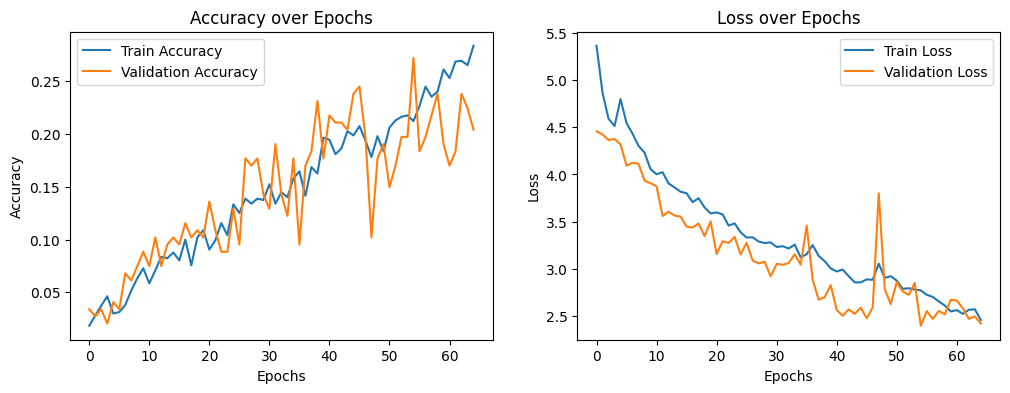

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# Early Stopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 훈련
history = model.fit(datagen.flow(X_train, y_train_categorical, batch_size=32),
                    validation_data=(X_test, y_test_categorical),
                    epochs=100,
                    callbacks=[early_stopping])

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test_categorical)
print(f'Test accuracy: {accuracy}')

# 정확도와 손실 값을 시각화하는 함수
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # 정확도 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    # 손실 값 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.show()

# 정확도와 손실 값 시각화
plot_history(history)